In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


df = pd.read_csv('train.csv')

In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

## EDA & data reprocessing

In [3]:
# isi pakai median
df['Age'].fillna(df['Age'].median(), inplace=True)

# isi pakai most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# hapus 'Cabin' column karena terlalu banyak missing value (apakah boleh? gakepake jg si)
df.drop(columns=['Cabin'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19704\3351801082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19704\3351801082.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [4]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [5]:
# hapus/drop data yang tidak terpakai/relevan
# yang terpakai -> age, sex, pclass

df = df.drop(columns=['PassengerId', 'Name'])
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


In [6]:
# label encoding

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
          Survived      Pclass         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.383838    2.308642    0.647587   29.3

In [7]:
# normalize age (karena fare tidak ditanya)
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
          Survived      Pclass         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.383838    2.308642    0.647587    0.3

## Feature Selection & Data Splitting

In [8]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x = df[selected_features]
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

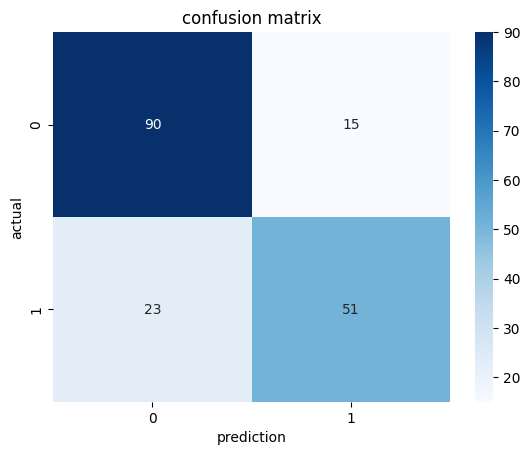

In [10]:
# confusin matrix
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(y_test, y_pred)
sns.heatmap(conmat, annot=True, fmt='d', cmap='Blues')

plt.xlabel("prediction")
plt.ylabel("actual")
plt.title("confusion matrix")

plt.show()

# Evaluation Metric

Accuracy: 0.7877
Classification:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
[[90 15]
 [23 51]]
Precision: 0.7727
Recall: 0.6892
F1 Score: 0.7286


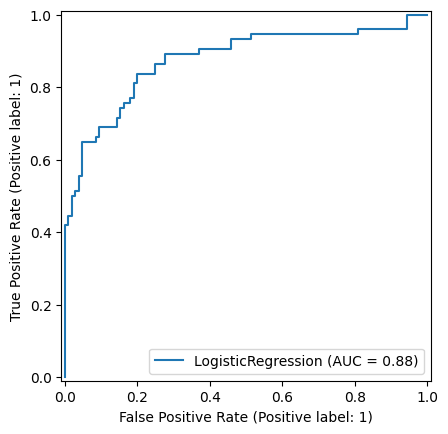

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay

# accureacy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# precision, recall & f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC curve
roc_curve = RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

# precision = TP / (TP + FP)
# recall = TP / (TP + FN)

# F1_score = 2 * (precision * recall) / (precision + recall)


# Analysis

model memiliki akurasi 78.77%, yang berarti sekitar 79% passenger dalam data uji diprediksi dengan benar apakah mereka selamat atau tidak.

    confusion matrix 
        True Negatives (TN) = 90 
        False Positives (FP) = 15 
        False Negatives (FN) = 23
        True Positives (TP) = 51
